In [1]:
import pandas as pd 


df_train = pd.read_csv("../data/train_dataset.csv")
df_test = pd.read_csv("../data/test_dataset.csv")
df_train.head()
df_test.head()

,text,label,label_text
0,Fears for T N pension after talks Unions repre...,2,Business
1,The Race is On: Second Private Team Sets Launc...,3,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,Sci/Tech


In [2]:
grouped_train = df_train.groupby(['label', 'label_text' ])['text'].count()
grouped_train

label  label_text
0      World         30000
1      Sports        30000
2      Business      30000
3      Sci/Tech      30000
Name: text, dtype: int64

In [3]:
grouped_test = df_test.groupby(['label', 'label_text' ])['text'].count()
grouped_test

label  label_text
0      World         1900
1      Sports        1900
2      Business      1900
3      Sci/Tech      1900
Name: text, dtype: int64

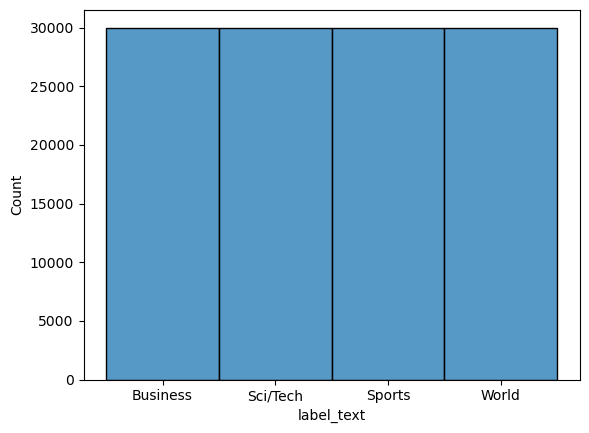

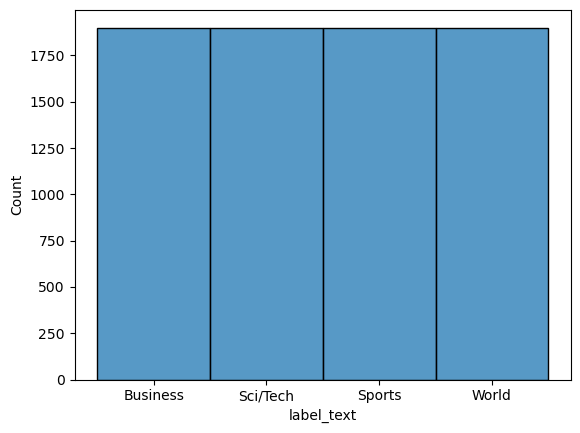

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 



sns.histplot(data=df_train["label_text"])
plt.show()


sns.histplot(data=df_test["label_text"])
plt.show()


In [5]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

df_train.isnull().sum()


0
0


text          0
label         0
label_text    0
dtype: int64

# pretraitement des texts

In [ ]:
import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Téléchargez les ressources NLTK nécessaires si ce n'est pas déjà fait
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data] Error downloading 'wordnet' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/wordnet.zip>:   [Errno 13]
[nltk_data]     Permission denied:
[nltk_data]     '/home/jovyan/nltk_data/corpora/wordnet.zip'


False

In [7]:
print(df_train["text"])
df_train["text_normalized"] = df_train["text"].str.lower()
df_train["text_normalized"] = df_train["text_normalized"].str.replace(r'[^a-z0-9\s]', '', regex=True)
df_train["text_normalized"]

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: text, Length: 120000, dtype: object


0         wall st bears claw back into the black reuters...
1         carlyle looks toward commercial aerospace reut...
2         oil and economy cloud stocks outlook reuters r...
3         iraq halts oil exports from main southern pipe...
4         oil prices soar to alltime record posing new m...
                                ...                        
119995    pakistans musharraf says wont quit as army chi...
119996    renteria signing a topshelf deal red sox gener...
119997    saban not going to dolphins yet the miami dolp...
119998    todays nfl games pittsburgh at ny giants time ...
119999    nets get carter from raptors indianapolis  all...
Name: text_normalized, Length: 120000, dtype: object

In [13]:
print(df_test["text"])
df_test["text_normalized"] = df_test["text"].str.lower()
df_test["text_normalized"] = df_test["text_normalized"].str.replace(r'[^a-z0-9\s]', '', regex=True)
df_test["text_normalized"]

0       Fears for T N pension after talks Unions repre...
1       The Race is On: Second Private Team Sets Launc...
2       Ky. Company Wins Grant to Study Peptides (AP) ...
3       Prediction Unit Helps Forecast Wildfires (AP) ...
4       Calif. Aims to Limit Farm-Related Smog (AP) AP...
                              ...                        
7595    Around the world Ukrainian presidential candid...
7596    Void is filled with Clement With the supply of...
7597    Martinez leaves bitter Like Roger Clemens did ...
7598    5 of arthritis patients in Singapore take Bext...
7599    EBay gets into rentals EBay plans to buy the a...
Name: text, Length: 7600, dtype: object


0       fears for t n pension after talks unions repre...
1       the race is on second private team sets launch...
2       ky company wins grant to study peptides ap ap ...
3       prediction unit helps forecast wildfires ap ap...
4       calif aims to limit farmrelated smog ap ap  so...
                              ...                        
7595    around the world ukrainian presidential candid...
7596    void is filled with clement with the supply of...
7597    martinez leaves bitter like roger clemens did ...
7598    5 of arthritis patients in singapore take bext...
7599    ebay gets into rentals ebay plans to buy the a...
Name: text_normalized, Length: 7600, dtype: object

In [8]:
stop_words = set(stopwords.words("english"))

def stop_words_remover(text): 
    tokens = text.split()
    tokens_filter = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens_filter)

In [14]:
df_train["text_normalized"] = df_train["text_normalized"].apply(lambda x: stop_words_remover(x))
df_test["text_normalized"] = df_test["text_normalized"].apply(lambda x: stop_words_remover(x))

In [16]:
df_train["text_normalized"]
df_test["text_normalized"]

0       fears n pension talks unions representing work...
1       race second private team sets launch date huma...
2       ky company wins grant study peptides ap ap com...
3       prediction unit helps forecast wildfires ap ap...
4       calif aims limit farmrelated smog ap ap southe...
                              ...                        
7595    around world ukrainian presidential candidate ...
7596    void filled clement supply attractive pitching...
7597    martinez leaves bitter like roger clemens almo...
7598    5 arthritis patients singapore take bextra cel...
7599    ebay gets rentals ebay plans buy apartment hom...
Name: text_normalized, Length: 7600, dtype: object

<h1 style="color:orange;">embedding section </h1>  <h2 style="color:red;">(executed in google colab) </h2> 


In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

In [22]:
embedding_train = model.encode(
    df_train["text"].tolist(),
    normalize_embeddings=True,
    show_progress_bar=True
)

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

In [18]:
embedding_test = model.encode(
    df_test["text"].tolist(),
    normalize_embeddings=True,
    show_progress_bar=True
)

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

In [ ]:
# Converted numpy arrays to standard lists for ChromaDB compatibility

df_train["embedding"] = embedding_train.tolist()
df_test["embedding"] = embedding_test.tolist()
df_train["embedding"]

0         [0.07367804646492004, -0.02631131373345852, 0....
1         [-0.0068568033166229725, -0.06906827539205551,...
2         [-0.01750737801194191, -0.0378166139125824, 0....
3         [-0.023455876857042313, -0.012443509884178638,...
4         [-0.07173541933298111, -0.022663453593850136, ...
                                ...                        
119995    [-0.024379216134548187, 0.0288537610322237, 0....
119996    [0.02762516587972641, 0.09636874496936798, -0....
119997    [-0.022888462990522385, 0.016298556700348854, ...
119998    [-0.030298784375190735, -0.0227406844496727, -...
119999    [-0.03888903930783272, -0.05788030847907066, -...
Name: embedding, Length: 120000, dtype: object

In [24]:
df_train["id"] = "train_" + df_train.index.astype(str)
df_test["id"] = "test_" + df_test.index.astype(str)

df_train.to_pickle("../data/train.pkl")
df_test.to_pickle("../data/test.pkl")